# 4 State Model Net Cycle Flux Testing

In [1]:
import os
import sys
import numpy as np
import networkx as nx
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sympy import *
import time
from sympy.parsing.sympy_parser import parse_expr


from kda import plotting, graph_utils, calculations, diagrams, expressions, ode

In [2]:
kvals1 = np.array([
    [0, 1, 0, 1],
    [1, 0, 1, 0],
    [0, 1, 0, 1],
    [1, 0, 1, 0],
])

kvals2 = np.array([
    [0, 1, 0, 1],
    [1, 0, 1, 1],
    [0, 1, 0, 1],
    [1, 1, 1, 0],
])

G1 = nx.MultiDiGraph()
graph_utils.generate_edges(G1, kvals1)
G2 = nx.MultiDiGraph()
graph_utils.generate_edges(G2, kvals2)
pos = {0 : [1, 1],
       1 : [-1, 1],
       2 : [-1, -1],
       3 : [1, -1]}

cwd = os.getcwd()

In [3]:
sol = ode.ode_solver(np.array([0.5, 0.5, 0, 0]), kvals1, t_max=5)
plotting.draw_ode_results(sol, path=cwd, label="4_state_ode_solution")

findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


In [4]:
plotting.draw_diagrams(G1, pos=pos, font_size=12, path=cwd, label="4_state_diagram", curved_arrows=True)
plotting.draw_diagrams(G2, pos=pos, font_size=12, path=cwd, label="4_state_leakage_diagram", curved_arrows=True)

In [5]:
pars = diagrams.generate_partial_diagrams(G2)
plotting.draw_diagrams(pars, pos=pos, panel=True, panel_scale=1.75, rows=1, cols=8, font_size=12, path=cwd, label="4wl_partial_diagrams")

dirpars = diagrams.generate_directional_diagrams(G2)
plotting.draw_diagrams(dirpars, pos=pos, panel=True, panel_scale=1.75, rows=4, font_size=12, cbt=True, path=cwd, label="4wl_directional_diagrams")

In [6]:
G1_cycle = graph_utils.find_all_unique_cycles(G1)[0]
G2_cycles = graph_utils.find_all_unique_cycles(G2)

# pick positive direction
order = [1, 0]

In [7]:
G2_cycles_reordered = [G2_cycles[1], G2_cycles[0], G2_cycles[2]]

In [8]:
plotting.draw_cycles(G2, G2_cycles_reordered, pos=pos, panel=True, panel_scale=1.75, font_size=12, path=cwd, label="4wl_cycles", curved_arrows=True, cbt=True)

In [9]:
rate_names1 = ["M_on, M_off, L_on, L_off, M_i, M_o, L_i, L_o"]
M_on, M_off, L_on, L_off, M_i, M_o, L_i, L_o = symbols(
    "M_on M_off L_on L_off M_i M_o L_i L_o"
)
k12, k21, k23, k32, k34, k43, k41, k14 = symbols(
"k12, k21, k23, k32, k34, k43, k41, k14"
)
sub_dict1 = {
    k12: M_on*M_i,
    k21: M_off,
    k23: L_on*L_i,
    k32: L_off,
    k34: L_off,
    k43: L_on*L_o,
    k41: M_off,
    k14: M_on*M_o,
}

    substitutions = {
        k12: M_on*M_i,
        k21: M_off,
        k23: L_on*L_i,
        k32: L_off,
        k34: L_off,
        k43: L_on*L_o,
        k41: M_off,
        k14: M_on*M_o,
        k24: k_leak,
        k42: k_leak,
    }

In [10]:
rate_names2 = ["M_on, M_off, L_on, L_off, k_leak, M_i, M_o, L_i, L_o"]
M_on, M_off, L_on, L_off, k_leak, M_i, M_o, L_i, L_o = symbols(
    "M_on M_off L_on L_off k_leak M_i M_o L_i L_o"
)
k12, k21, k23, k32, k34, k43, k41, k14, k24, k42 = symbols(
"k12, k21, k23, k32, k34, k43, k41, k14, k24, k42"
)
sub_dict2 = {
    k12: M_on*M_i,
    k21: M_off,
    k23: L_on*L_i,
    k32: L_off,
    k34: L_off,
    k43: L_on*L_o,
    k41: M_off,
    k14: M_on*M_o,
    k24: k_leak,
    k42: k_leak,
}

M_on = 1e10
M_off = 1e3
L_on = 1e9
L_off = 1e2
M_i = 10 ** (-6.5)
M_o = 10 ** (-7.5)
L_o = 10 ** (-7.9)
L_i = 10 ** (-8.1)

rate_names2s = ["k_leak"]
k_leak = symbols("k_leak")
sub_dict2s = {
    k12: M_on*M_i,
    k21: M_off,
    k23: L_on*L_i,
    k32: L_off,
    k34: L_off,
    k43: L_on*L_o,
    k41: M_off,
    k14: M_on*M_o,
    k24: k_leak,
    k42: k_leak,
}

In [11]:
G2_orders = [
    [0, 1],
    [0, 1],
    [1, 2],
]

In [12]:
G1_cycle_flux_str = calculations.calc_net_cycle_flux(G1, G1_cycle, order=[0, 1], key='name', output_strings=True)
G2_cycle_flux_strs = []
for order, cycle in zip(G2_orders, G2_cycles):
    print("*** Cycle: ", cycle)
    G2_cycle_flux_strs.append(calculations.calc_net_cycle_flux(G2, cycle, order=order, key='name', output_strings=True))

Cycle [0, 3, 2, 1] contains all nodes in G. No flux diagrams generated.
No flux diagrams detected for cycle [0, 3, 2, 1]. Sigma K value is 1.
*** Cycle:  [0, 3, 2, 1]
Cycle [0, 3, 2, 1] contains all nodes in G. No flux diagrams generated.
No flux diagrams detected for cycle [0, 3, 2, 1]. Sigma K value is 1.
*** Cycle:  [0, 3, 1]
*** Cycle:  [1, 3, 2]


In [13]:
G1_prob_strs = calculations.calc_state_probs(G1, key='name', output_strings=True)
G2_prob_strs = calculations.calc_state_probs(G2, key='name', output_strings=True)

## Before Simplifications

In [14]:
G2_cycle_flux_strs[0]

(k12*k23*k34*k41 - k14*k21*k32*k43)/(k12*k23*k34 + k12*k23*k41 + k12*k23*k42 + k12*k23*k43 + k12*k24*k32 + k12*k24*k34 + k12*k24*k43 + k12*k32*k41 + k12*k32*k42 + k12*k32*k43 + k12*k34*k41 + k12*k34*k42 + k14*k21*k32 + k14*k21*k34 + k14*k21*k43 + k14*k23*k34 + k14*k23*k42 + k14*k23*k43 + k14*k24*k32 + k14*k24*k34 + k14*k24*k43 + k14*k32*k42 + k14*k32*k43 + k14*k34*k42 + k21*k32*k41 + k21*k32*k42 + k21*k32*k43 + k21*k34*k41 + k21*k34*k42 + k23*k34*k41 + k24*k32*k41 + k24*k34*k41)

## After Simplifications

In [15]:
simplify(G2_prob_strs[0].subs(sub_dict2))

L_off*M_off*(L_i*L_on + L_o*L_on + 2*M_off + 4*k_leak)/(L_i*L_o*L_on**2*M_i*M_on + L_i*L_o*L_on**2*M_o*M_on + L_i*L_off*L_on*M_i*M_on + L_i*L_off*L_on*M_o*M_on + L_i*L_off*L_on*M_off + L_i*L_on*M_i*M_off*M_on + L_i*L_on*M_i*M_on*k_leak + L_i*L_on*M_o*M_on*k_leak + L_o*L_off*L_on*M_i*M_on + L_o*L_off*L_on*M_o*M_on + L_o*L_off*L_on*M_off + L_o*L_on*M_i*M_on*k_leak + L_o*L_on*M_o*M_off*M_on + L_o*L_on*M_o*M_on*k_leak + 2*L_off*M_i*M_off*M_on + 4*L_off*M_i*M_on*k_leak + 2*L_off*M_o*M_off*M_on + 4*L_off*M_o*M_on*k_leak + 2*L_off*M_off**2 + 4*L_off*M_off*k_leak)

### 4 State Probs

In [16]:
G2_simplified_prob_funcs = []
for str_func in G2_prob_strs:
    func = latex(simplify(str_func.subs(sub_dict2)))
    G2_simplified_prob_funcs.append(func)

### 4 State Cycle Flux

In [17]:
G2_sympy_funcs = []
for str_func in G2_cycle_flux_strs:
    G2_sympy_funcs.append(simplify(str_func.subs(sub_dict2)))

In [18]:
G1_sympy_func = simplify(G1_cycle_flux_str.subs(sub_dict1))
G1_net_cycle_flux_func = expressions.construct_lambda_funcs(G1_sympy_func, rate_names1)

In [19]:
G2_net_cycle_flux_funcs = expressions.construct_lambda_funcs(G2_sympy_funcs, rate_names2)

In [20]:
M_on = 1e10
M_off = 1e3
L_on = 1e9
L_off = 1e2
M_i = 10 ** (-6.5)
M_o = 10 ** (-7.5)
L_o = 10 ** (-6.9)
L_i = 10 ** (-7.1)

power_max = 2
step = 1e-1

powers = np.arange(-2, power_max, step=step, dtype=float)
leak_array = 10 ** powers

G1_flux = []
G2_flux = []
for k_leak in leak_array:
    G1_flux.append(G1_net_cycle_flux_func(M_on, M_off, L_on, L_off, M_i, M_o, L_i, L_o))
    G2_fluxes = []
    for func in G2_net_cycle_flux_funcs:
        G2_fluxes.append(func(M_on, M_off, L_on, L_off, k_leak, M_i, M_o, L_i, L_o))
    G2_flux.append(G2_fluxes)
G2_flux = np.array(G2_flux)

M_flux = G2_flux[:, 0] + G2_flux[:, 1]
L_flux = G2_flux[:, 0] + G2_flux[:, 2]

findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


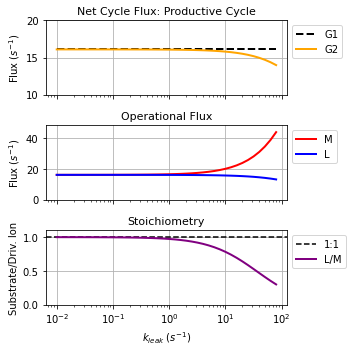

In [21]:
fig, axs = plt.subplots(3, figsize=(5, 5), sharex=True, tight_layout=True)

axs[0].semilogx(leak_array, G1_flux, '--', lw=2, color="black", label="G1")
axs[0].semilogx(leak_array, G2_flux[:, 0], '-', lw=2, color="orange", label="G2")
axs[0].set_title("Net Cycle Flux: Productive Cycle", fontsize=11)
axs[0].set_ylabel(r"Flux ($s^{-1}$)", fontsize=10)
axs[0].set_ylim(10, 20)
axs[0].legend(bbox_to_anchor=(1, 1))
axs[0].grid(True)

axs[1].semilogx(leak_array, M_flux, '-', color='red', lw=2, label=r"M")
axs[1].semilogx(leak_array, L_flux, '-', color='blue', lw=2, label=r"L")
axs[1].set_title("Operational Flux", fontsize=11)
axs[1].set_ylabel(r"Flux ($s^{-1}$)", fontsize=10)
axs[1].set_ylim(0, np.max(M_flux)*1.1)
axs[1].legend(bbox_to_anchor=(1, 1))
axs[1].grid(True)

axs[2].axhline(y=1, ls='--', color='black', label="1:1")
axs[2].semilogx(leak_array, L_flux/M_flux, '-', lw=2, color="purple", label=r"L/M")
axs[2].set_title("Stoichiometry", fontsize=11)
axs[2].set_ylabel("Substrate/Driv. Ion", fontsize=10)
axs[2].set_xlabel(r"$k_{leak}$ ($s^{-1}$)")
axs[2].set_ylim(0, 1.1)
axs[2].legend(bbox_to_anchor=(1, 1))
axs[2].grid(True)
plt.savefig(cwd+"/4wl_all_in_one_plot.png", dpi=300)